In [1]:
import os
from utils.auxiliary_func import *
from utils.plots_func import *
import config.const as const

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import ast
import json
from statsmodels.stats.multitest import multipletests


## Define Parameters

In [2]:
figure_3_dir = os.path.join(const.BASE_DIR, 'figure_results', 'Figure 3')
os.makedirs(figure_3_dir, exist_ok=True)

DATA_PREPARATION_DIR = const.DATA_PREPARATION_DIR

## Plot Pearson correlation between distance and difference in lifetime

#### Note on Data Preparation

The csv data used in this code was generated in the following notebook:

**`TNBC_FLIM/notebooks/lifetime_spatial_relationships.ipynb`**

Please make sure to run that notebook first to prepare the necessary data files before executing this one.

In [3]:
correlation_path = os.path.join(DATA_PREPARATION_DIR, 'correlation_df_distance_and_difference_in_lifetime_tissue_wise.csv')

df = pd.read_csv(correlation_path)
df['sample'] = 'tissue'
df.head()

,leap_ID,Correlation,sample
0,15,0.947149,tissue
1,17,0.984799,tissue
2,19,0.941284,tissue
3,21,0.930563,tissue
4,23,0.984135,tissue


/home/reutme/TNBC-SPATIAL-CHROMATIN-COMPACTION/utils/plots_func.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_col, y=col, data=df, order=order,
/home/reutme/TNBC-SPATIAL-CHROMATIN-COMPACTION/utils/plots_func.py:239: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=category_col, y=col, data=df, order=order,


Figure saved as pdf at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 3/similarity_proximity_lifetime_corr_box_plot.pdf


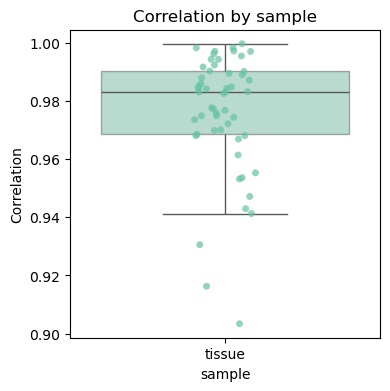

In [5]:
plt_fig = plot_boxplot_by_category(df, 'Correlation', category_col='sample', figsize=(4,4))
save_file_name= "similarity_proximity_lifetime_corr_box_plot"
save_fig(figure_3_dir, save_file_name, 'pdf', plt_fig)

## GNN results

In [3]:
patch_size = 1500

### Plot ROC-AUC of GNN model 

In [4]:
gnn_model_results_path = os.path.join(DATA_PREPARATION_DIR, f"patch_{patch_size}_gnn_model_agg_results_patch_wise.csv")
seeds_gnn_df = pd.read_csv(gnn_model_results_path)

# Convert JSON strings back to Python lists
seeds_gnn_df['fpr_agg'] = seeds_gnn_df['fpr_agg'].apply(json.loads)
seeds_gnn_df['tpr_agg'] = seeds_gnn_df['tpr_agg'].apply(json.loads)

seed_list_gnn, auc_list_gnn, fpr_list_gnn, tpr_list_gnn = seeds_gnn_df['seed_val'], seeds_gnn_df['auc_agg'], seeds_gnn_df['fpr_agg'], seeds_gnn_df['tpr_agg']

Median AUC: 0.7289855072463768


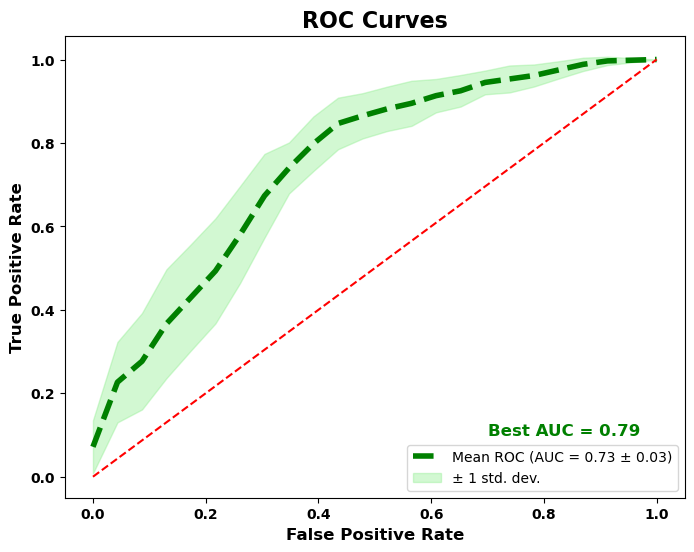

In [5]:
# Plot both ROC curves
plot_mean_auc_roc_lists(
    fpr_list_gnn, tpr_list_gnn, auc_list_gnn,
    std_num=1,
    # save_file_path=figure_3_dir,
    # save_file_name="roc_curve_gnn_model_results",
    title='ROC Curves')

### Plot the distribution of auc gnn models

In [8]:
gnn_auc_models_path = os.path.join(DATA_PREPARATION_DIR, 'auc_df_gnn_models.csv')
auc_df = pd.read_csv(gnn_auc_models_path)
auc_df.head()

,AUC,Model
0,0.698551,GNN
1,0.742029,GNN
2,0.730435,GNN
3,0.679710,GNN
4,0.720290,GNN


/home/reutme/TNBC-SPATIAL-CHROMATIN-COMPACTION/utils/plots_func.py:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_col, y=col, data=df, order=order,
/home/reutme/TNBC-SPATIAL-CHROMATIN-COMPACTION/utils/plots_func.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=category_col, y=col, data=df, order=order,


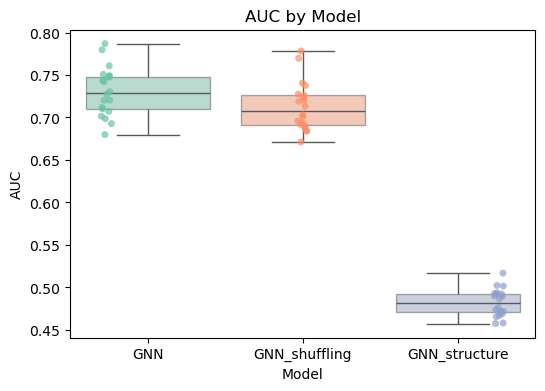

In [9]:
plt_fig = plot_boxplot_by_category(auc_df, 'AUC', category_col='Model', figsize=(6,4))
save_file_name= "compare_models_seeds_auc_box_plot"
# save_fig(figure_3_dir, save_file_name, 'pdf', plt_fig)

In [10]:
auc_list_gnn = auc_df[auc_df['Model'] == 'GNN']['AUC']
auc_list_gnn_shuffling = auc_df[auc_df['Model'] == 'GNN_shuffling']['AUC']
auc_list_gnn_structure = auc_df[auc_df['Model'] == 'GNN_structure']['AUC']

In [11]:

# --- U-test: GNN vs GNN with shuffling ---
stat1, pval1 = mannwhitneyu(auc_list_gnn, auc_list_gnn_shuffling, alternative='greater')
print("Mann-Whitney U Test (One-Sided, Independent Samples)")
print("H0: AUC(GNN) ≤ AUC(GNN Shuffling)")
print("H1: AUC(GNN) > AUC(GNN Shuffling)")
print(f"U-statistic: {stat1}")
print(f"One-sided p-value: {pval1:.8f}\n")

# --- U-test: GNN with shuffling vs GNN without lifetime ---
stat2, pval2 = mannwhitneyu(auc_list_gnn_shuffling, auc_list_gnn_structure, alternative='greater')
print("Mann-Whitney U Test (One-Sided, Independent Samples)")
print("H0: AUC(GNN Shuffling) ≤ AUC(GNN Structure)")
print("H1: AUC(GNN Shuffling) > AUC(GNN Structure)")
print(f"U-statistic: {stat2}")
print(f"One-sided p-value: {pval2:.8f}\n")

# --- U-test: GNN vs GNN without lifetime ---
stat3, pval3 = mannwhitneyu(auc_list_gnn, auc_list_gnn_structure, alternative='greater')
print("Mann-Whitney U Test (One-Sided, Independent Samples)")
print("H0: AUC(GNN) ≤ AUC(GNN Structure)")
print("H1: AUC(GNN) > AUC(GNN Structure)")
print(f"U-statistic: {stat3}")
print(f"One-sided p-value: {pval3:.8f}\n")

# --- Multiple hypothesis correction using Benjamini-Hochberg (FDR) ---
pvals = np.array([pval1, pval2, pval3])
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')

# --- Display corrected results ---
print("Benjamini-Hochberg (FDR) correction applied:")
for i, (raw, corrected, is_significant) in enumerate(zip(pvals, pvals_corrected, reject), start=1):
    print(f"Test {i}: raw p = {raw:.8f}, corrected p = {corrected:.8f}, significant = {is_significant}")


Mann-Whitney U Test (One-Sided, Independent Samples)
H0: AUC(GNN) ≤ AUC(GNN Shuffling)
H1: AUC(GNN) > AUC(GNN Shuffling)
U-statistic: 275.5
One-sided p-value: 0.02120761

Mann-Whitney U Test (One-Sided, Independent Samples)
H0: AUC(GNN Shuffling) ≤ AUC(GNN Structure)
H1: AUC(GNN Shuffling) > AUC(GNN Structure)
U-statistic: 400.0
One-sided p-value: 0.00000003

Mann-Whitney U Test (One-Sided, Independent Samples)
H0: AUC(GNN) ≤ AUC(GNN Structure)
H1: AUC(GNN) > AUC(GNN Structure)
U-statistic: 400.0
One-sided p-value: 0.00000003

Benjamini-Hochberg (FDR) correction applied:
Test 1: raw p = 0.02120761, corrected p = 0.02120761, significant = True
Test 2: raw p = 0.00000003, corrected p = 0.00000005, significant = True
Test 3: raw p = 0.00000003, corrected p = 0.00000005, significant = True
